## MACHINE LEARNING PROJECT

## Project Name: Life Expectancy Prediction Using Machine Learning
### Project by- Swapnali Yashwant Khopatkar.

#### Student Details :
#### ID : TH_IV/2307/11119
### Name : Swapnali Yashwant Khopatkar
### Email : khopatkarswapnali@gmail.com
### Mobile : 7083308083
### Guided by- Sameer Warsolkar Sir

## Abstract

Life Expectancy is an important metric to assess the health of a nation. 
This project presents a comparative analysis of life expectancy between developed and developing countries with the help of a Supervised Machine Learning model.

The prediction model is trained using three regression models, namely Random Forest Regressor, DecisionTreeRegressor, LinearRegression.

The selection of model is done on the basis of R 2 score & Mean Squared Error . 

Random Forest Regressor is selected for the development of the prediction model for life expectancy, as it had R2 score as 0.99 and 0.95 on training & testing data respectively. 

 The study undertaken suggests that, developed countries have high life expectancy as compared to developing countries. India has high adult mortality as compared to considered developed countries because of the low expenditure on healthcare. The insights from this analysis can be used by Government and Healthcare sectors for the betterment of society.

## 1. Importing Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error as mape, mean_squared_error as mse
import warnings
warnings.filterwarnings('ignore')

## 2. Reading the Dataset

In [2]:
data=pd.read_csv('Life Expectancy Data.csv')

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.shape

(2938, 22)

#### *Our Dataset contain 2938 rows and 22 columns*

### *Columns Meaning*

 **Country** : Country 
 
**Year** : Year

**Status** : Country Developed or Developing status

**Life expectancy** : Life expectancy in age

**Adult Mortality** : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

**infant deaths** : Number of Infant Deaths per 1000 population

**Alcohol** : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) -percentage 

**expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita(%)

**Hepatitis B** : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

**Measles** : Measles - number of reported cases per 1000 population

**BMI** : Average Body Mass Index of entire population

**under-five deaths** : Number of under-five deaths per 1000 population

**Polio** : Polio (Pol3) immunization coverage among 1-year-olds (%)

**Total expenditure** : General government expenditure on health as a percentage of total government expenditure (%)

**Diphtheria** : Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

**HIV/AIDS** : Deaths per 1 000 live births HIV/AIDS (0-4 years

**GDP** : Gross Domestic Product per capita (in USD)

**Population** : Population of the country

**thinness 1-19 years** : Prevalence of thinness among children and adolescents for Age 10 to 19 (%)

**thinness 5-9 years** : Prevalence of thinness among children for Age 5 to 9(%)

**Income composition of resources** : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

**Schooling** : Number of years of Schooling(years)

In [5]:
# A Quick information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

#### There are some leading and trailing spaces in column names so i will remove them for further operations

In [6]:
data.rename(str.strip ,axis='columns' , inplace=True)
columns=data.columns
new_cols=[]
for i in columns:
    new_cols.append(i.strip().replace(' ','_'))    
data.columns=new_cols    

#### The columnnames are Now in understandable format without any spaces

In [7]:
# As this columnname must be corrected with 10 to 19 not 1 to 19
data.rename(columns={'thinness__1-19_years':'thinness_10_19_years'},inplace=True)

In [8]:
# Statistical information of all numerical columns
data.describe() 

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_10_19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## 3. Missing Values Detection

In [5]:
data.describe().iloc[:,1:] #skipped the 'Year' feature 

,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_10_19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Things that may not make sense from above:

* Adult mortality of 1? The adult mortality is the probability of death between age 15 to 60. This is likely an error in measurement, but what values make sense here? May need to change to null if under a certain threshold. 
* Infant deaths as low as 0 per 1000? That just isn't plausible - I'm deeming those values to actually be null. Also on the other end 1800 is likely an outlier, but it is possible in a country with very high birthrates and perhaps a not very high population total - this can be dealt with later.
* BMI of 1 and 87.3? Pretty sure the whole population would not exist if that were the case. A BMI of 15 or lower is seriously underweight and a BMI of 40 or higher is morbidly obese, therefore a large number of these measurements just seem unrealistic...this variable might not be worth digging into at all.
* Under Five Deaths, similar to infant deaths just isn't likely (perhaps even impossible) to have values at zero.
* GDP per capita as low as 1.68 (USD) possible? Doubtful - but perhaps values this low are outliers.
* Population of 34 for an entire country? 

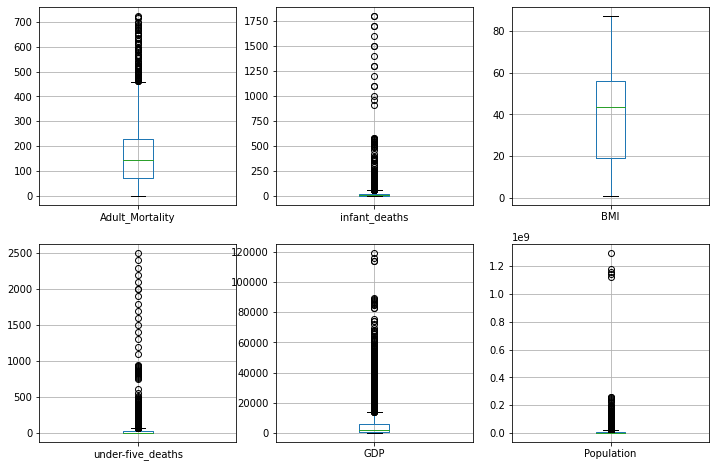

In [9]:
plt.figure(figsize=(12,8))
for i, col in enumerate(['Adult_Mortality','infant_deaths','BMI','under-five_deaths','GDP','Population']):
    plt.subplot(2,3,i+1)
    data.boxplot(col)

There are a few of the above that could simply be outliers, but there are some that almost certainly have to be errors of some sort. Of the above variables, changes to null will be made for the following since these numbers don't make any sense:

1) Adult mortality rates lower than the 5th percentile

2) Infant deaths of 0

3) BMI less than 10 and greater than 50

4) Under Five deaths of 0

#### The features having some errors to be corrected to the certain threshold

In [10]:
# to replace null at the adult mortality of less than 5 percentile
mort_5_percentile = np.percentile(data.Adult_Mortality.dropna(), 5)
data.Adult_Mortality = data.apply(lambda x: np.nan if x.Adult_Mortality < mort_5_percentile else x.Adult_Mortality, axis=1)

# to replace the 0 infantdeaths with null
data.infant_deaths = data.infant_deaths.replace(0, np.nan)

#To replace the bmi less than 10 or greater than 50 with null
data.BMI = data.apply(lambda x: np.nan if (x.BMI < 10 or x.BMI > 50) else x.BMI, axis=1)

#replace 0s with null in under five deaths
data['under-five_deaths'] = data['under-five_deaths'].replace(0, np.nan)

In [11]:
# Checking for null/missing values
data.isnull().sum()

Country                               0
Year                                  0
Status                                0
Life_expectancy                      10
Adult_Mortality                     155
infant_deaths                       848
Alcohol                             194
percentage_expenditure                0
Hepatitis_B                         553
Measles                               0
BMI                                1456
under-five_deaths                   785
Polio                                19
Total_expenditure                   226
Diphtheria                           19
HIV/AIDS                              0
GDP                                 448
Population                          652
thinness_10_19_years                 34
thinness_5-9_years                   34
Income_composition_of_resources     167
Schooling                           163
dtype: int64

#### Nearly half of the BMI variable's values are null,, it is likely best to remove this variable altogether.

In [12]:
data.drop(columns='BMI', inplace=True) #As total rows are 2938 out of 1456 are null 

Alright, so it looks like there are a lot of columns containing null values, since this is time series data assorted by country, the best course of action would be to interpolate the data by country. However, when attempting to interpolate by country it doesn't fill in any values as the countries' data for all the null values are null for each year, therefore imputation by year may be the best possible method here. Imputation of each year's mean is done below.

### Replacing Null values with the median as there are some outliers in our data

In the following loop, the null values are filled with 
mean of the column where the year is same

In [13]:
imputed_data = []
for year in list(data.Year.unique()):
    year_data = data[data.Year == year].copy()
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().median()).copy()
    imputed_data.append(year_data)
data = pd.concat(imputed_data).copy()

In [14]:
data.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_10_19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.238462,171.768890,32.958816,4.637600,738.251295,82.644656,2419.592240,44.970558,82.605344,6.005061,82.374575,1.742103,6657.444137,1.024153e+07,4.822362,4.852689,0.630526,12.013513
std,4.613841,9.510459,118.943766,117.316899,3.921306,1987.914858,22.881890,11467.272489,159.749128,23.362728,2.416410,23.649290,5.077785,13284.996285,5.402084e+07,4.397466,4.485674,0.205378,3.267787
min,2000.000000,36.300000,13.000000,1.000000,0.010000,0.000000,1.000000,0.000000,1.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,84.000000,4.000000,1.082500,4.685343,82.000000,0.000000,4.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,148.000000,9.000000,4.100000,64.912906,91.000000,17.000000,11.000000,93.000000,5.895000,93.000000,0.100000,1791.067713,1.412669e+06,3.300000,3.300000,0.681000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [15]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness_10_19_years               0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

### We have successfully replaced the missing values with medians

## 4. Outliers Detection

In [16]:
data_num=data.select_dtypes(exclude=object).columns.tolist()
data_num.remove('Year')

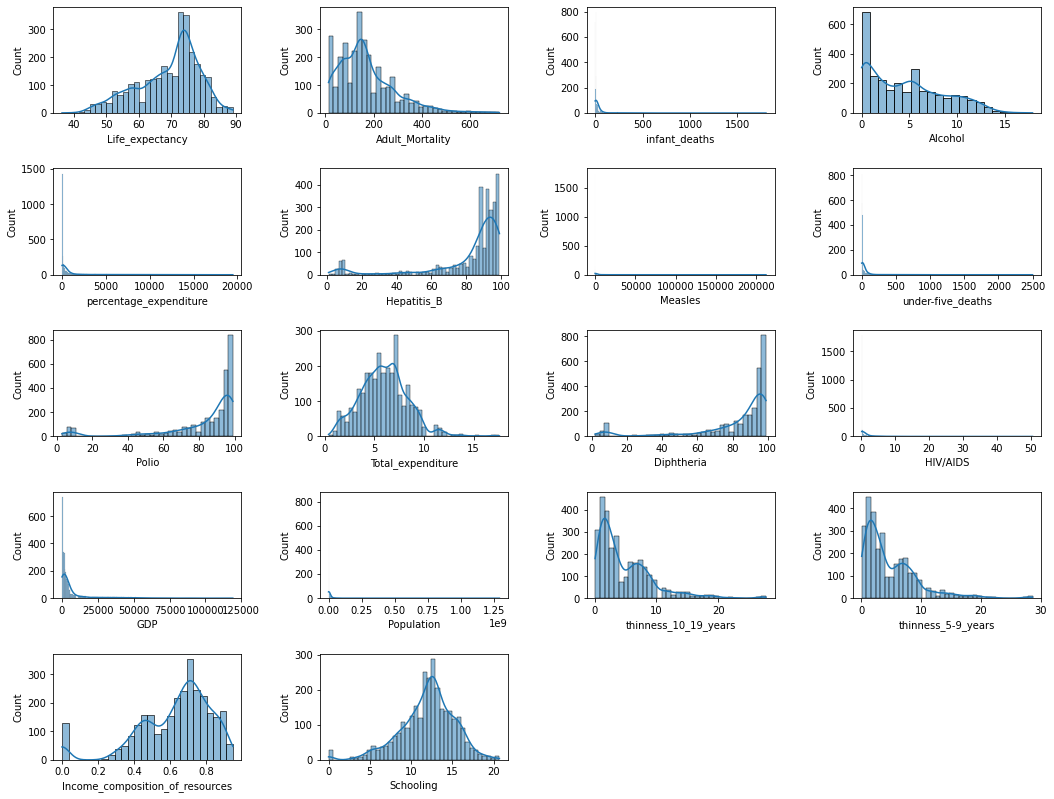

In [17]:
plt.figure(figsize=(15,20))
for i, col in enumerate(data_num):    
    plt.subplot((len(data_num) + 1) // 2, 4, i+1 )
    sns.histplot(x=col,data=data,kde=True)    
plt.tight_layout(pad = 2)

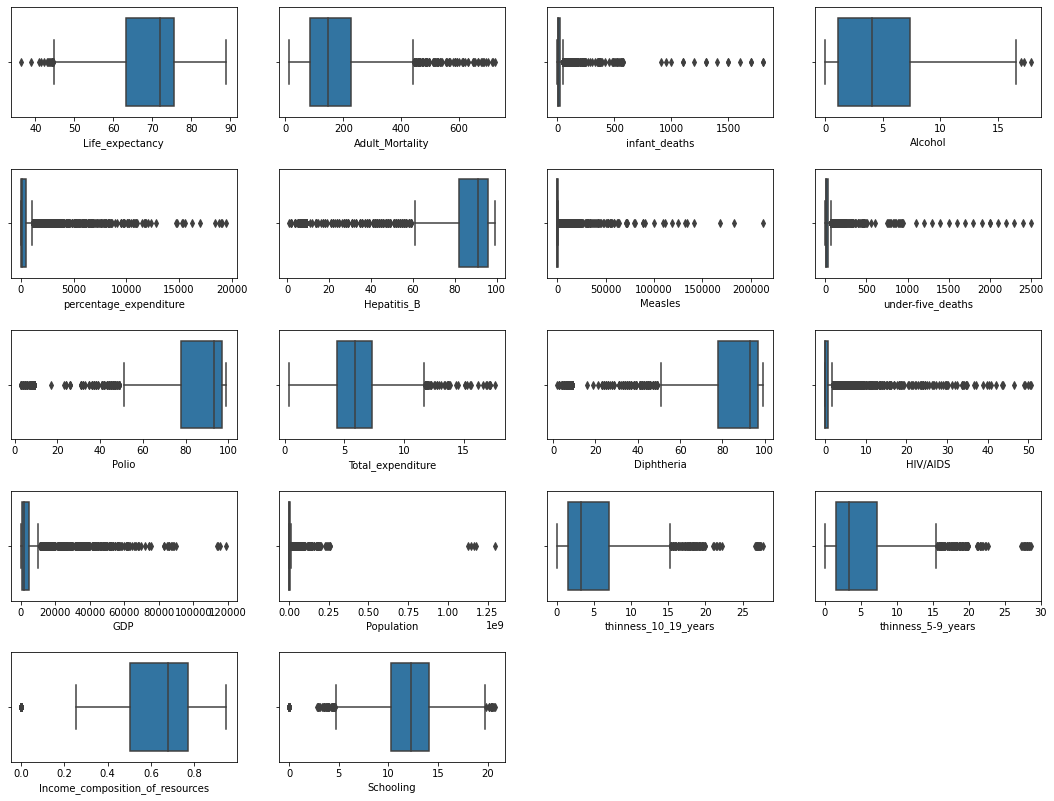

In [18]:
plt.figure(figsize=(15,20))
for i, col in enumerate(data_num):    
    plt.subplot((len(data_num) + 1) // 2, 4, i+1 )
    sns.boxplot(x=col,data=data)    
plt.tight_layout(pad = 2)

Visually, it is plain to see that there are a number of outliers for all of these variables - including the target variable, life expectancy. 
Firstly i am calculating the total outliers using IQR method.
outliers being considered anything outside of 1.5 times the IQR.

In [19]:
outliersless = []
outliersgreat=[]
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if i<lwr_bound:
            outliersless.append(i)
        if i>upr_bound:
            outliersgreat.append(i)
            
    return outliersless,outliersgreat # Driver code


for col in data_num:
    outliersless , outliersgreat = detect_outliers_iqr(data[col])
    print(f"Outliers of {col}: lessmin: {len(outliersless)} greatermax: {len(outliersgreat)}")
    outliersless.clear(),outliersgreat.clear()


Outliers of Life_expectancy: lessmin: 17 greatermax: 0
Outliers of Adult_Mortality: lessmin: 0 greatermax: 97
Outliers of infant_deaths: lessmin: 0 greatermax: 374
Outliers of Alcohol: lessmin: 0 greatermax: 3
Outliers of percentage_expenditure: lessmin: 0 greatermax: 389
Outliers of Hepatitis_B: lessmin: 322 greatermax: 0
Outliers of Measles: lessmin: 0 greatermax: 542
Outliers of under-five_deaths: lessmin: 0 greatermax: 418
Outliers of Polio: lessmin: 279 greatermax: 0
Outliers of Total_expenditure: lessmin: 0 greatermax: 51
Outliers of Diphtheria: lessmin: 298 greatermax: 0
Outliers of HIV/AIDS: lessmin: 0 greatermax: 542
Outliers of GDP: lessmin: 0 greatermax: 445
Outliers of Population: lessmin: 0 greatermax: 452
Outliers of thinness_10_19_years: lessmin: 0 greatermax: 100
Outliers of thinness_5-9_years: lessmin: 0 greatermax: 99
Outliers of Income_composition_of_resources: lessmin: 130 greatermax: 0
Outliers of Schooling: lessmin: 64 greatermax: 13


Since each variable has a unique amount of outliers and also has outliers on different sides of the data, the best route to take is probably replacing the values with 25 percentile and 75 percentile for each side of the data. 

In [20]:
for col in data_num:
    outliersless , outliersgreat = detect_outliers_iqr(data[col])
    mi=np.percentile(data[col],25)
    ma=np.percentile(data[col],75)
    data[col].replace(to_replace=outliersless,value=mi,inplace=True)
    data[col].replace(to_replace=outliersgreat,value=ma,inplace=True)
    
    outliersless.clear(),outliersgreat.clear()

All the variables have now been replaced as little as possible in order to keep as much data in tact as possible while still being able to eliminate the outliers. 

### Finally, bellow boxplots will be shown for each variable's replaced data to show that the outliers have indeed been dealt with.

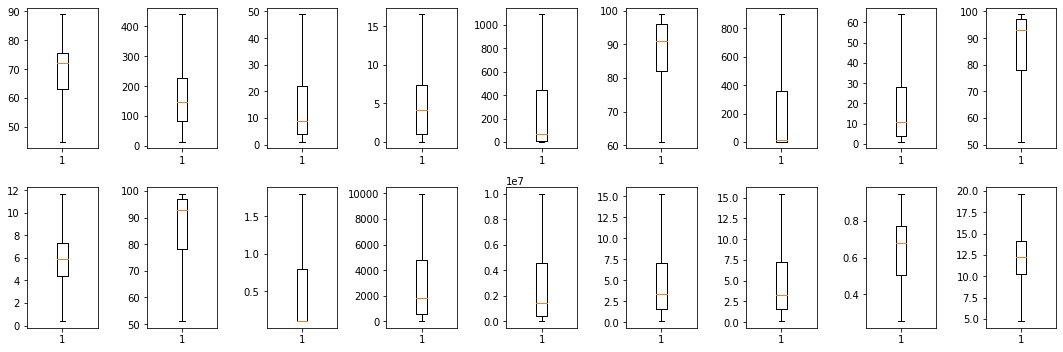

In [22]:
plt.figure(figsize=(15,5))
for i, col in enumerate(data_num, 1):
    plt.subplot(2, 9, i)
    plt.boxplot(data[col])
plt.tight_layout()
plt.show()

### Now that the outliers have been dealt with, the data cleaning section is complete.

## 5. Data Exploration

The following histogram shows the distribution of each feature

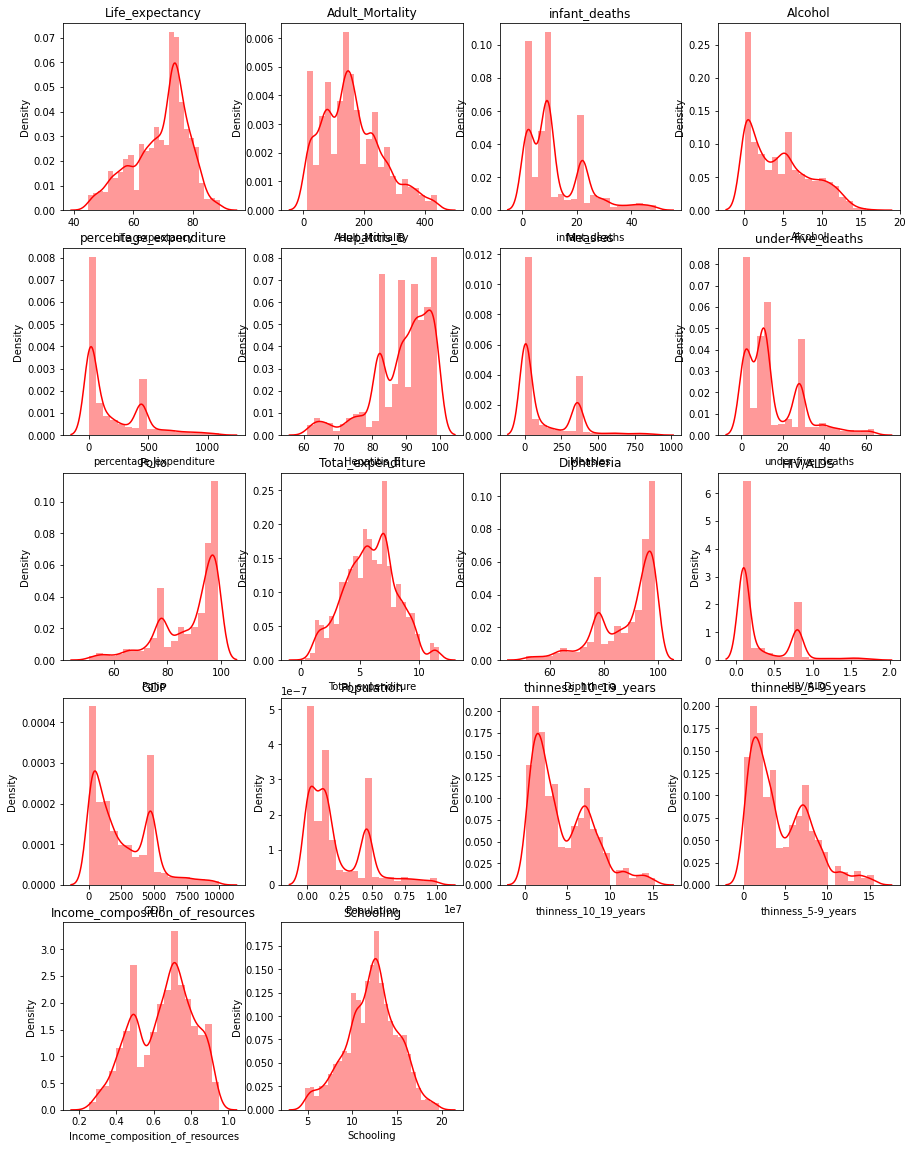

In [23]:
plt.figure(figsize=(15,20))
for i ,col in enumerate(data_num,1):
    plt.subplot(5,4,i)
    sns.distplot(data[col],color='red')
    plt.title(col)

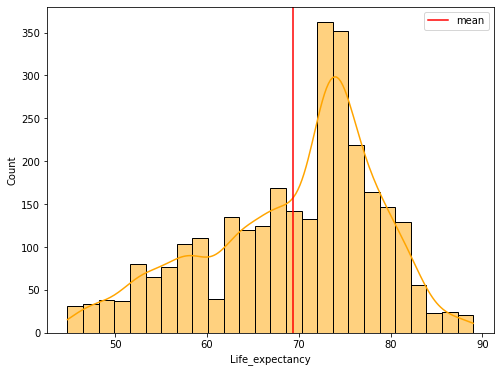

In [24]:
plt.figure(figsize=(8,6))
sns.histplot(data['Life_expectancy'],kde=True,color='orange')
plt.axvline(data['Life_expectancy'].mean(),color='red',label='mean')
plt.legend()
plt.show()

**This above graph shows the distribution of **target column i.e. 'Life Expectancy'**
**Most of the lifespan lies between 45 to 90 years, with an average lifespan of 69 years**


In [25]:
data['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

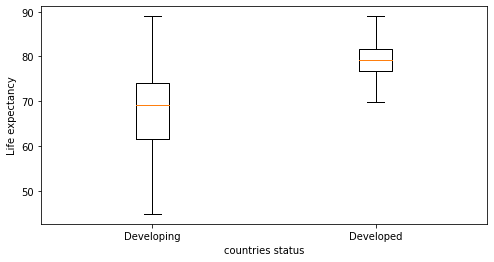

In [27]:
plt.figure(figsize=(8,4))
plt.boxplot([data[data['Status']=='Developing']['Life_expectancy'],data[data['Status']=='Developed']['Life_expectancy']],labels=['Developing','Developed'])
plt.ylabel('Life expectancy')
plt.xlabel('countries status')

plt.show()

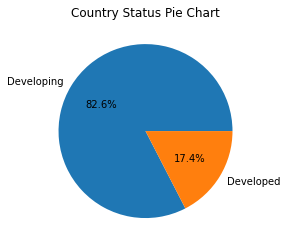

In [28]:
plt.pie(data['Status'].value_counts(),labels=data['Status'].value_counts().index,autopct='%1.1f%%')
plt.title('Country Status Pie Chart')

plt.show()

This **boxplot** and **pieplot** shows that developed countries are stable because the range of the live expectancy age of developed countries is short, also the developing countries may have very different life expenctacy rates

## 6. Data Visualization

In [29]:
data[data_num].corr()

,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_10_19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
Life_expectancy,1.000000,-0.620182,-0.471747,0.399570,0.417137,0.321337,-0.309690,-0.485480,0.565206,0.247272,0.563065,-0.706526,0.490669,-0.030806,-0.556720,-0.552063,0.825853,0.737758
Adult_Mortality,-0.620182,1.000000,0.286892,-0.202242,-0.253704,-0.220937,0.202378,0.300587,-0.347217,-0.152735,-0.341228,0.506421,-0.284599,0.064195,0.341977,0.347734,-0.522314,-0.448980
infant_deaths,-0.471747,0.286892,1.000000,-0.284077,-0.269255,-0.283539,0.391352,0.919662,-0.358004,-0.123044,-0.369474,0.323561,-0.305174,0.175365,0.369103,0.366175,-0.486980,-0.463912
Alcohol,0.399570,-0.202242,-0.284077,1.000000,0.288436,0.176477,-0.189626,-0.298072,0.283874,0.325135,0.307505,-0.238150,0.341216,0.059358,-0.423848,-0.416844,0.508111,0.531858
percentage_expenditure,0.417137,-0.253704,-0.269255,0.288436,1.000000,0.161137,-0.178267,-0.286503,0.249592,0.144441,0.269671,-0.272929,0.724438,0.024857,-0.275578,-0.275418,0.483094,0.468559
Hepatitis_B,0.321337,-0.220937,-0.283539,0.176477,0.161137,1.000000,-0.216784,-0.286027,0.641416,0.071548,0.672338,-0.264480,0.231572,-0.092461,-0.123449,-0.129564,0.343759,0.322454
Measles,-0.309690,0.202378,0.391352,-0.189626,-0.178267,-0.216784,1.000000,0.382211,-0.276787,-0.136789,-0.280304,0.200192,-0.204359,0.149775,0.303943,0.302578,-0.288798,-0.312215
under-five_deaths,-0.485480,0.300587,0.919662,-0.298072,-0.286503,-0.286027,0.382211,1.000000,-0.368972,-0.126643,-0.382251,0.339920,-0.318383,0.189046,0.378097,0.373590,-0.507937,-0.474732
Polio,0.565206,-0.347217,-0.358004,0.283874,0.249592,0.641416,-0.276787,-0.368972,1.000000,0.167397,0.897543,-0.438078,0.339024,-0.086337,-0.300962,-0.292669,0.566830,0.526018
Total_expenditure,0.247272,-0.152735,-0.123044,0.325135,0.144441,0.071548,-0.136789,-0.126643,0.167397,1.000000,0.176832,-0.104335,0.135119,-0.003940,-0.298064,-0.311881,0.212505,0.292478


Above table shows the correlation 

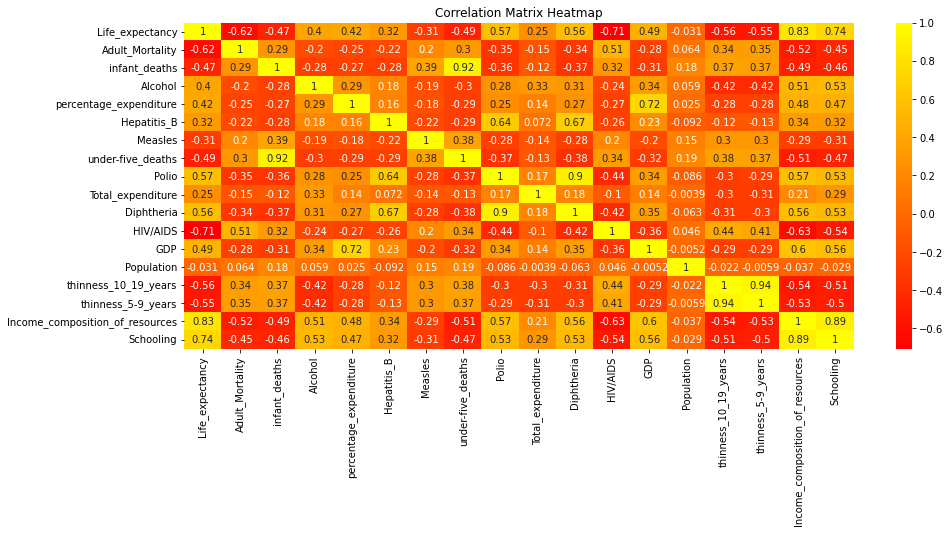

In [30]:
plt.figure(figsize=(15,6))
sns.heatmap(data[data_num].corr(), annot=True, cmap='autumn')
plt.title('Correlation Matrix Heatmap')
plt.show()

The above heatmap is very useful! It very easily displays a number of important correlations between variables. Some general takeaways from the graphic above:

•  Life Expectancy (target variable) appears to be relatively highly correlated (negatively or positively) with:

•   Adult Mortality (negative)

•	HIV/AIDS (negative)

•	Income Composition of Resources (positive)

•	Schooling (positive)

•	Life expectancy (target variable) is extremely lowly correlated to population (nearly no correlation at all)

•	Infant deaths and Under Five deaths are extremely highly correlated

•	Percentage Expenditure and GDP are relatively highly correlated

•	Hepatitis B vaccine rate is relatively positively correlated with Polio and Diphtheria vaccine rates

•	Polio vaccine rate and Diphtheria vaccine rate are very positively correlated

•	HIV/AIDS is relatively negatively correlated with Income Composition of Resources

•	Thinness of 5-9 Year olds rate and Thinness of 10-15 Year olds rate is extremely highly correlated

•	Income Composition of Resources and Schooling are very highly correlated

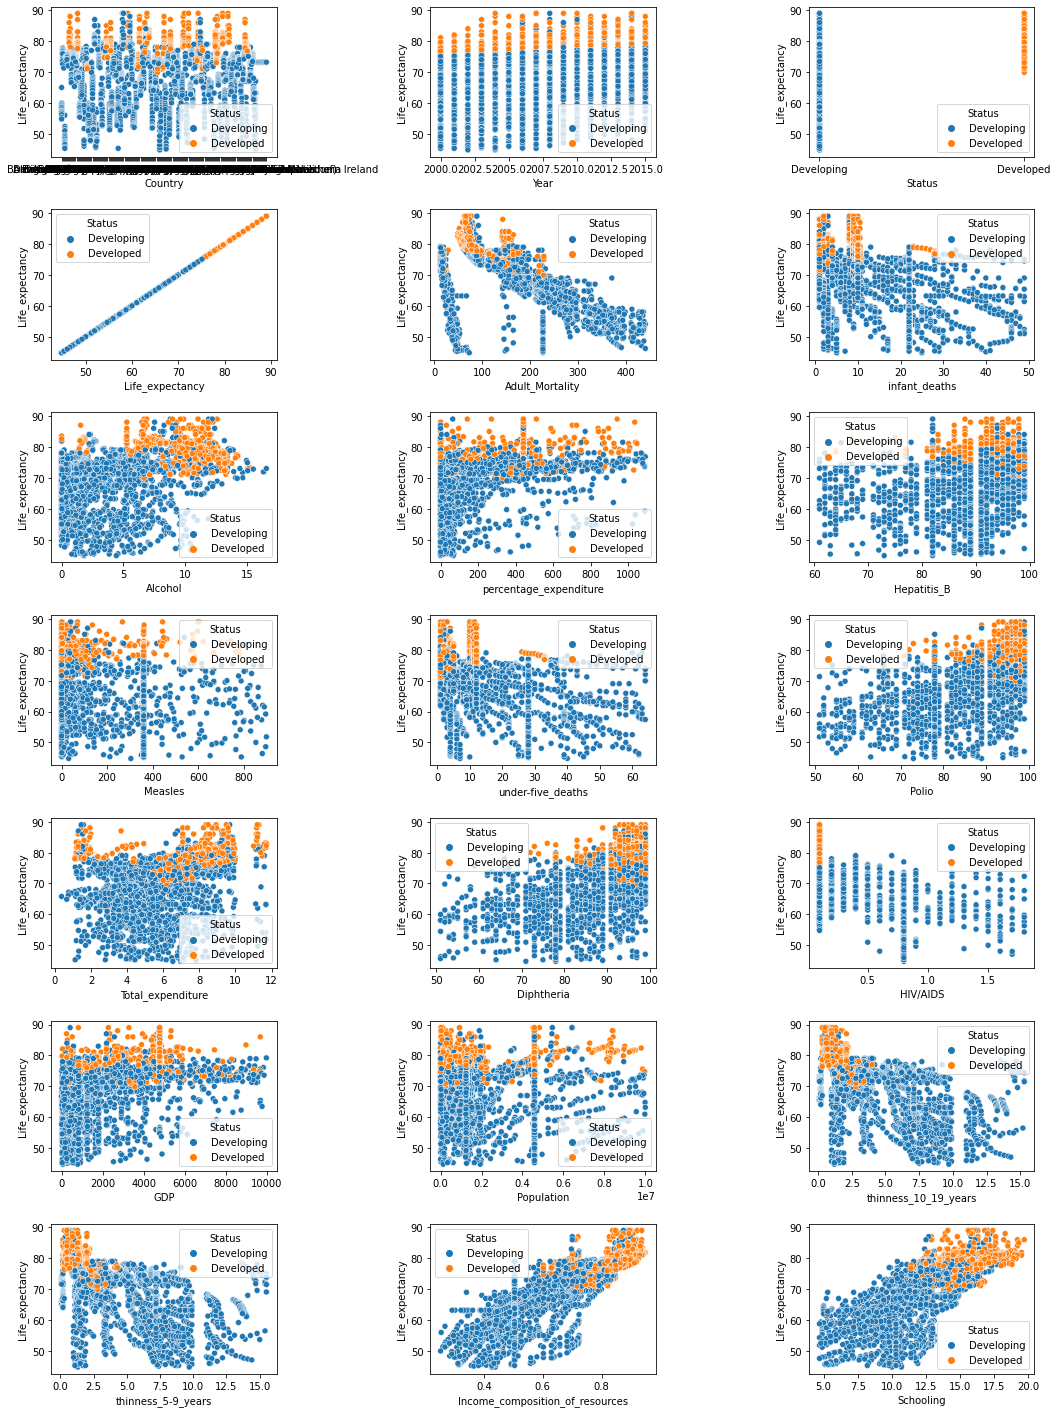

In [32]:
plt.figure(figsize=(15,20))
for i ,col in enumerate(data,1):
    
    plt.subplot(7,3,i)
    sns.scatterplot(x= data[col], y= data['Life_expectancy'], hue=data.Status)
    plt.xlabel(col)    
    plt.ylabel('Life_expectancy')  
plt.tight_layout(pad = 2)

**Observation:**
Life_Expectancy has somewhat Negative relationship with AdultMortality.
Life_Expectancy has positive relationship with Income_Comp_Of_Resources and Schooling.

## 7. Label Encoding

Now we have to do label encoding on the categorical features

In [33]:
data_cat=data.select_dtypes(object).columns

In [34]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [35]:
# create object from labelencoder
le = LabelEncoder()
for column in data_cat:
    data[column]=le.fit_transform(data[column])

## 8. Feature selection

**separate the target column and independent variables**

In [36]:
x=data.drop('Life_expectancy',axis=1)

In [37]:
y=data['Life_expectancy']

## 9. Split the Training and Testing  data for the Model training

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# spliting data to train and test
xtrain, xtest, ytrain, ytest =  train_test_split(x,y, test_size = 0.2, random_state = 42)

## 10. Model Training and Testing 

In [40]:
alg= [RandomForestRegressor(),DecisionTreeRegressor(), LinearRegression()]    
for i in alg:
    model= i
    model.fit(xtrain, ytrain)
    ypredtestdata= model.predict(xtest)
    ypredtraindata= model.predict(xtrain)
    print(i, "Train Root Mean Squared error:", np.sqrt(mse(ytrain, ypredtraindata)))
    print(i, "Train Accuracy:", (r2_score(ytrain, ypredtraindata))*100)
    print("*"*50)
    print(i, "Test Root Mean Squared error:", np.sqrt(mse(ytest, ypredtestdata)))
    print(i, "Test Accuracy:", (r2_score(ytest, ypredtestdata))*100)
    print("="*70)

RandomForestRegressor() Train Root Mean Squared error: 0.8176879431301571
RandomForestRegressor() Train Accuracy: 99.22452351690009
**************************************************
RandomForestRegressor() Test Root Mean Squared error: 2.1884115352508666
RandomForestRegressor() Test Accuracy: 94.55594113815172
DecisionTreeRegressor() Train Root Mean Squared error: 3.5903095795213697e-16
DecisionTreeRegressor() Train Accuracy: 100.0
**************************************************
DecisionTreeRegressor() Test Root Mean Squared error: 3.1193002442223228
DecisionTreeRegressor() Test Accuracy: 88.93938743321449
LinearRegression() Train Root Mean Squared error: 4.159638678597001
LinearRegression() Train Accuracy: 79.93197378958395
**************************************************
LinearRegression() Test Root Mean Squared error: 4.368581242821021
LinearRegression() Test Accuracy: 78.30569932357476


In [41]:
alg= [RandomForestRegressor(),DecisionTreeRegressor(), LinearRegression()]
tsscore=[]
trscore=[]
msescore=[]
for index,i in enumerate(alg):
    model= i   
    model.fit(xtrain, ytrain)
    y_pred= model.predict(xtest)
    accts_score=r2_score(ytest,y_pred) #test score
    tsscore.append(accts_score*100)
    ypredtr= model.predict(xtrain)
    acctr_score=r2_score(ytrain,ypredtr) #train score    
    trscore.append(acctr_score*100)
    ms=np.sqrt(mse(ytest, y_pred)) #mse score
    msescore.append(ms)

In [42]:
alg= ['RandomForestRegressor()', 'DecisionTreeRegressor()', 'LinearRegression()']
df=pd.DataFrame({'Model':alg,'test_acc_score':tsscore,'train_acc_score':trscore,'MSE_score':msescore})
df

,Model,test_acc_score,train_acc_score,MSE_score
0,RandomForestRegressor(),94.755602,99.231146,2.147907
1,DecisionTreeRegressor(),89.233280,100.000000,3.077580
2,LinearRegression(),78.305699,79.931974,4.368581


#### From the above results, we can see that  almost all the models are giving best accuracy
#### Random Forest algorithm giving us best accuracy score i.e. 96.16%

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(xtrain, ytrain)
y_pred= rf.predict(xtest)
y_pred2= rf.predict(xtrain)
test_score=r2_score(ytest,y_pred)
print("Test Root Mean Squared error:", round(np.sqrt(mse(ytest, y_pred)),2))

print('R2_score:',test_score*100)
print("Mean Absolute Percentage Error:", round(mape(ytest, y_pred)*100),2)

Test Root Mean Squared error: 2.18
R2_score: 94.57967060302359
Mean Absolute Percentage Error: 2 2


Text(0.5, 0, 'Predicted')

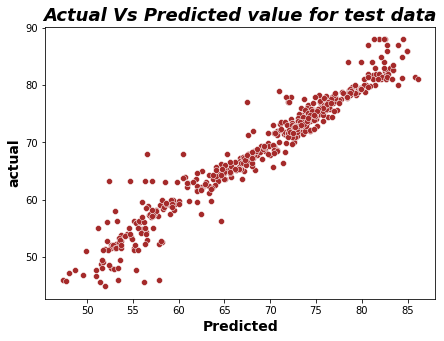

In [45]:
plt.figure(figsize= [7,5])
sns.scatterplot(y=ytest, x= y_pred,color= "brown")
plt.title("Actual Vs Predicted value for test data", fontsize= 18,fontweight="bold", fontstyle="italic")
plt.ylabel("actual", fontsize= 14, fontweight="bold")
plt.xlabel("Predicted", fontsize=14, fontweight="bold")

Text(0.5, 0, 'Actual')

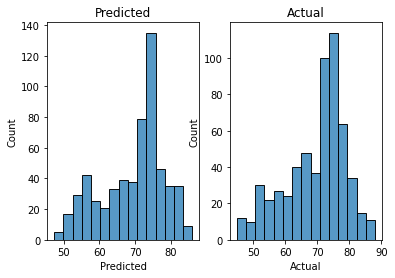

In [46]:
plt.subplot(1,2,1)
sns.histplot(y_pred)
plt.title("Predicted")
plt.xlabel("Predicted")
plt.subplot(1,2,2)
sns.histplot(ytest)
plt.title("Actual")
plt.xlabel("Actual")

### The above graph shows the predicted and actual life expectancy distribution

### From the above results, we can see that  almost all the models are giving best accuracy
### Random Forest algorithm giving us best accuracy score/ R2 score i.e. 94.5%